In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline


In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())



 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# NaN Data 갯수 확인하기

titanic_df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Age 는 평균 나머진 N으로 채우기

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('DataSet Null Counts : ', titanic_df.isnull().sum().sum())


DataSet Null Counts :  0


In [6]:
# 남은 문자열 피처 값 분류 확인

print(' Sex Value 분포 : \n', titanic_df['Sex'].value_counts())
print(' Cabin Value 분포 : \n', titanic_df['Cabin'].value_counts())
print(' Embarked Value 분포 : \n', titanic_df['Embarked'].value_counts())


Sex Value 분포 : 
 male      577
female    314
Name: Sex, dtype: int64
 Cabin Value 분포 : 
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
B73              1
C30              1
C46              1
B38              1
B71              1
Name: Cabin, Length: 148, dtype: int64
 Embarked Value 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [7]:
# Cabin 속성 앞 문자만 추출

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))


0    N
1    C
2    N
Name: Cabin, dtype: object


In [8]:
# 성별에 따른 생존자 수 0 - Dead 1 - Survived

titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

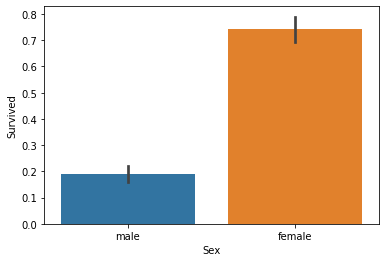

In [9]:
# 가로 막대 플롯으로 만들기

sns.barplot(x='Sex', y='Survived', data=titanic_df)


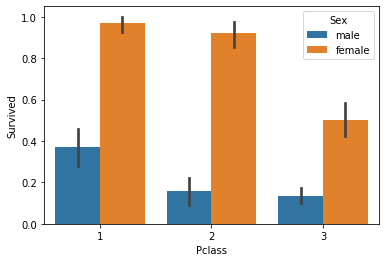

In [10]:
# 객실 등급별 성별에 따른 생존 확률

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)


In [11]:
# Age 값에 따라 분류
# A분류 함수 작성

def get_category(age):
    cat = ''
    if age <= 5:
        cat = 'Baby'
    elif age <= 12:
        cat = 'Child'
    elif age <= 18:
        cat = 'Teenager'
    elif age <= 25:
        cat = 'Student'
    elif age <= 35:
        cat = 'Young Adult'
    elif age <= 60:
        cat = 'Adult'
    else:
        cat = 'Elderly'
    return cat


In [12]:
# 막대그래프의 크기 figure를 더 크게 설정

plt.figure(figsize=(10, 6))
# x축의 값을 순차적으로 표시하기 위한 설정

group_names = ['Unknown', 'Baby', 'Child', 'Teenager',
               'Student', 'Young Adult', 'Adult', 'Elderly']


<Figure size 720x432 with 0 Axes>

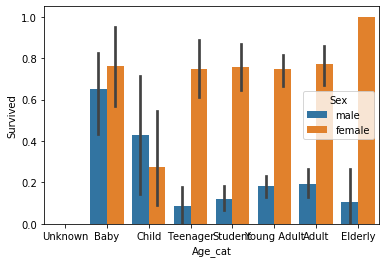

In [13]:
# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(x) 는 입력값으로 'Age' 칼럼 값을 받아서 해당되는 Cat 반환

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot('Age_cat', 'Survived', 'Sex', titanic_df, group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)


In [14]:
# Label Encoding

def encode_features(dataDF):
    Features = ['Cabin', 'Sex', 'Embarked']
    for feature in Features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF


In [15]:
titanic_df = encode_features(titanic_df)
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [16]:
# Null 처리 함수

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df


In [17]:
# 머신러닝 알고리즘에 불필요한 속성 제거

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


In [18]:
# label encoding

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


In [19]:
#앞에서 설정한 데이터 전처리 함수 호출

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [20]:
# 원본 데이터 재로딩, 피처데이터 세트와 레이블 데이터 세트 추출

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = transform_features(x_titanic_df)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)


In [22]:
#결정 트리, Random Forest, 로지스틱 희귀를 위한 사이킷런 classifier 클래스 생성

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()


In [23]:
#DecisionTreeClassfier 학습/예측/평가

dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))


DecisionTreeClassifier 정확도:0.7877


In [24]:
# RandomForestClassifier 학습/예측/평가

rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))


RandomForestClassifier 정확도:0.8547


In [25]:
#LogisticRegression 학습/예측/평가

lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도:0.8492


In [31]:
def exec_kfold(clf, folds=5):
    # Fold를 5개생성
    kfold = KFold(n_splits=folds)
    scores = []
    # KFold 교차검증 진행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        x_train, x_test = x_titanic_df.values[train_index],  x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df[train_index], y_titanic_df[test_index]
        # classifier 학습 예측 정확도 계산
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))


In [32]:
# exec_kfold 호출

exec_kfold(dt_clf, folds=5)


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도 : 0.7823
